In [1]:
from astropy.io import fits
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('seaborn')
import datetime as dt
from astropy.stats import LombScargle

In [2]:
data_930 = pd.read_excel('../data/0930_measurements.xlsx')
filebase_930 = '../data/science/0930/processed/'
obs_930 = [fits.getheader(filebase_930 + row['Label'])['DATE-OBS'] for index, row in data_930.iterrows()]
data_930['DATE-OBS'] = obs_930

data_1018 = pd.read_excel('../data/1018_measurements.xlsx')
filebase_1018 = '../data/science/1018/processed/'
obs_1018 = [fits.getheader(filebase_1018 + row['Label'])['DATE-OBS'] for index, row in data_1018.iterrows()]
data_1018['DATE-OBS'] = obs_1018

In [3]:
full_data = data_930.append(data_1018, ignore_index=True)
fmt = '%Y-%m-%dT%H:%M:%S.%f'
times = [dt.datetime.strptime(time, fmt) for time in full_data['DATE-OBS']]
time_since = [(time - times[0]).total_seconds() / (60) for i, time in enumerate(times)]
full_data['Time Since'] = time_since

full_data.to_csv('../data/full_data.csv')
t, mags, err = full_data[['Time Since', 'Source_AMag_T1', 'Source_AMag_Err_T1']].values.T

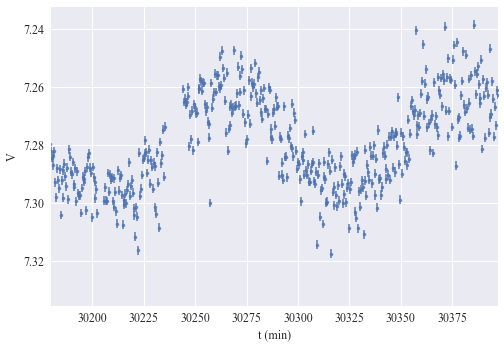

In [4]:
params = {
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'axes.labelsize':12,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal'
}
matplotlib.rcParams.update(params)

plt.errorbar(t, mags, yerr=err,alpha=0.8,fmt='.')
plt.xlabel('t (min)')
plt.ylabel('V')
plt.xlim(30180, max(t))
plt.gca().invert_yaxis()

# plt.savefig('../docs/figs/mags.png')

0.00880673702772
113.549433445 0.078853773226


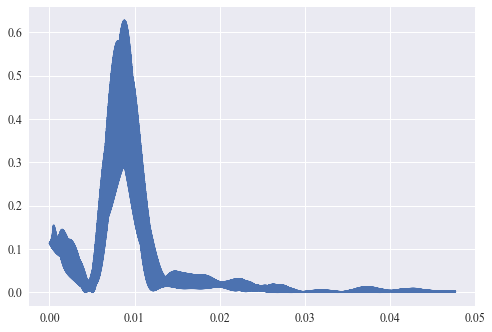

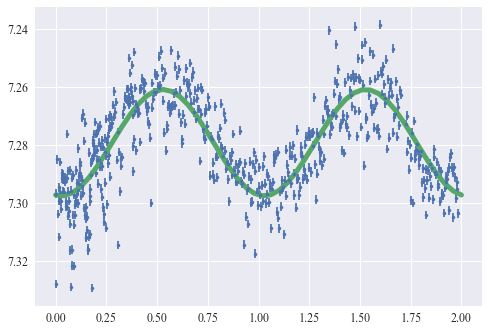

In [5]:
# frequency = np.linspace(1./100, 1./130, 100)
LS = LombScargle(t, mags, dy=err, nterms=1)
frequency, power = LS.autopower()
plt.plot(frequency, power)
best_frequency = frequency[np.argmax(power)]

phase = (t * best_frequency) % 2

plt.figure()
plt.gca().invert_yaxis()
plt.errorbar(phase, mags, yerr=err, fmt='.')

phase_fit = np.linspace(0, 2)
y_fit = LS.model(phase_fit / best_frequency, best_frequency)
plt.plot(phase_fit, y_fit, lw=5)

print(best_frequency)
print(1/best_frequency, 1/best_frequency/60/24)